In [1]:
# basics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# load data
df = pd.read_csv('brain_stroke.csv')
print("shape:", df.shape)
df.head()


shape: (4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# make all column names lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# see new column names
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# drop any duplicate rows if they exist
df = df.drop_duplicates()

# check shape after removing duplicates
df.shape


(4981, 11)

In [6]:
# find missing values
df.isnull().sum()

# fill missing numeric values with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# fill missing text values with mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# check again
df.isnull().sum()


/tmp/ipython-input-2212650516.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2212650516.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [7]:
# change yes/no or true/false columns to 1 and 0
map_dict = {'yes':1, 'no':0, 'true':1, 'false':0}
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.lower().map(map_dict).fillna(df[col])

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
# make dummy variables for text columns
df = pd.get_dummies(df, drop_first=True)

# check result
df.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,True,True,False,False,True,True,False,False
1,80.0,0,1,1,105.92,32.5,1,True,True,False,False,False,False,True,False
2,49.0,0,0,1,171.23,34.4,1,False,True,False,False,True,False,False,True
3,79.0,1,0,1,174.12,24.0,1,False,False,True,False,False,False,True,False
4,81.0,0,0,1,186.21,29.0,1,True,True,False,False,True,True,False,False


In [9]:
# standardize (make mean=0, std=1) for numeric columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# check first few rows
df.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,-0.326186,4.136753,0.720137,2.723411,1.193238,4.368601,True,True,False,False,True,True,False,False
1,1.614270,-0.326186,4.136753,0.720137,-0.000523,0.589390,4.368601,True,True,False,False,False,False,True,False
2,0.246250,-0.326186,-0.241735,0.720137,1.448529,0.869222,4.368601,False,True,False,False,True,False,False,True
3,1.570141,3.065738,-0.241735,0.720137,1.512650,-0.662492,4.368601,False,False,True,False,False,False,True,False
4,1.658400,-0.326186,-0.241735,0.720137,1.780895,0.073909,4.368601,True,True,False,False,True,True,False,False


In [10]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look better
plt.style.use('ggplot')


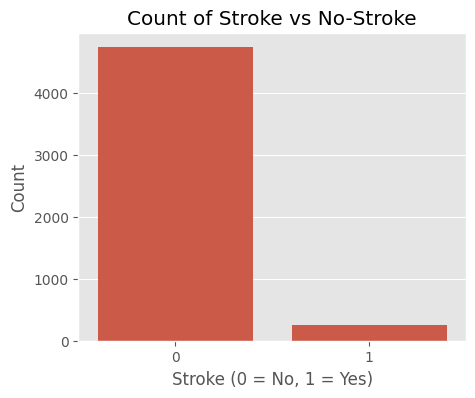

In [12]:
# make sure we display proper 0/1 on x-axis
plt.figure(figsize=(5,4))

# if stroke column is scaled, bring it back to binary
if df['stroke'].dtype != 'int64' and df['stroke'].dtype != 'float64':
    df['stroke'] = df['stroke'].astype(float)

# try to binarize scaled stroke column (any value > 0 → 1)
stroke_binary = np.where(df['stroke'] > 0, 1, 0)

sns.countplot(x=stroke_binary)
plt.title('Count of Stroke vs No-Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


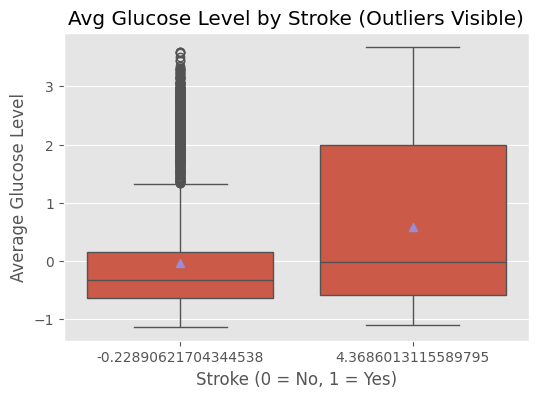

In [17]:
# check for outliers in average glucose levels grouped by stroke
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, showmeans=True)
plt.title('Avg Glucose Level by Stroke (Outliers Visible)')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.show()


stroke_bin
0    4733
1     248
Name: count, dtype: int64
True
['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'stroke_bin']


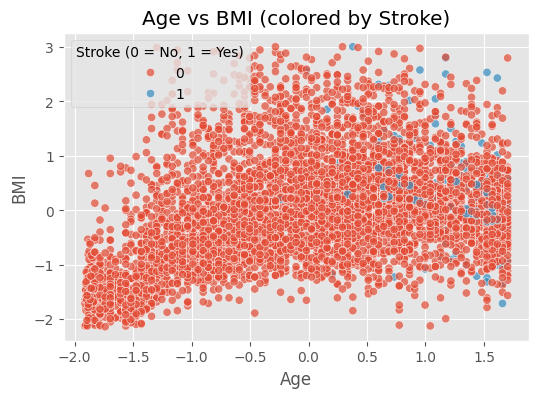

In [23]:
# make sure stroke_bin exists
import numpy as np

if 'stroke_bin' not in df.columns:
    # threshold splits data roughly into two groups
    thresh = df['stroke'].median()
    df['stroke_bin'] = (df['stroke'] > thresh).astype(int)

print(df['stroke_bin'].value_counts())

# check if bmi exists
print('bmi' in df.columns)
# if not, check column names
print(df.columns.tolist())

# now draw the scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='bmi', hue='stroke_bin', data=df, alpha=0.7)
plt.title('Age vs BMI (colored by Stroke)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.show()



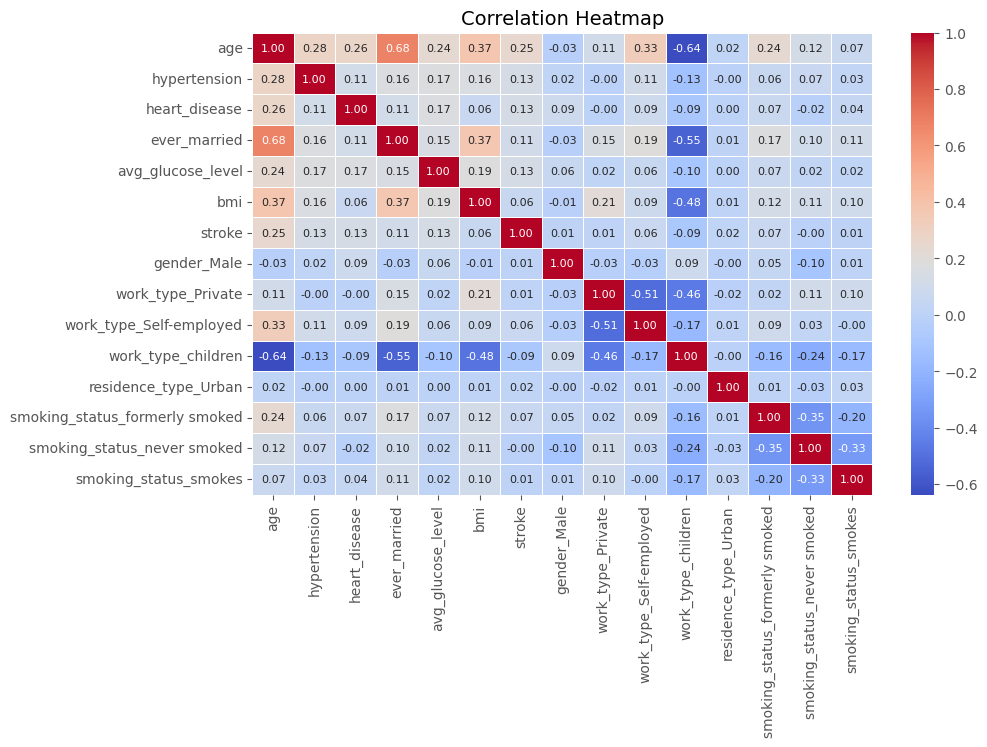

In [16]:
# better correlation heatmap with visible numbers
plt.figure(figsize=(10,6))

# compute correlation
corr = df.corr()

# draw heatmap with annotations
sns.heatmap(corr,
            cmap='coolwarm',       # color palette
            annot=True,            # show correlation numbers
            fmt=".2f",             # keep 2 decimal places
            annot_kws={"size":8},  # smaller text for clarity
            linewidths=0.5)        # thin lines between cells

plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [24]:
# target: use stroke_bin if present; else build it from 'stroke'
import numpy as np
from sklearn.model_selection import train_test_split

if 'stroke_bin' in df.columns:
    y = df['stroke_bin'].astype(int)
else:
    # make a binary split from scaled 'stroke'
    y = (df['stroke'] > df['stroke'].median()).astype(int)

# basic X: drop target-like and obvious id if present
drop_cols = [c for c in ['stroke', 'stroke_bin', 'id'] if c in df.columns]
X = df.drop(columns=drop_cols)

# stratified split keeps class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("train:", X_train.shape, " test:", X_test.shape)
print("class balance (train):", y_train.value_counts(normalize=True).round(3).to_dict())


train: (3984, 14)  test: (997, 14)
class balance (train): {0: 0.95, 1: 0.05}


In [25]:
# if y is already 0/1, nothing to do; else map to numbers
import pandas as pd

if not pd.api.types.is_numeric_dtype(y_train):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = pd.Series(le.fit_transform(y_train), index=y_train.index)
    y_test  = pd.Series(le.transform(y_test), index=y_test.index)

print("unique target values (train):", sorted(y_train.unique()))


unique target values (train): [np.int64(0), np.int64(1)]


In [26]:
# encode only object/category columns; keep numeric as is
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X_train.select_dtypes(include=['number', 'bool']).columns.tolist()

ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

X_train_enc = ct.fit_transform(X_train)
X_test_enc  = ct.transform(X_test)

print("encoded shapes:", X_train_enc.shape, X_test_enc.shape)


encoded shapes: (3984, 14) (997, 14)


In [27]:
# scale AFTER encoding, fit on train only
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled  = scaler.transform(X_test_enc)

print("scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


scaled shapes: (3984, 14) (997, 14)


In [29]:
# balance the training data; leave test set untouched
from imblearn.over_sampling import SMOTE

# simple version (no n_jobs)
sm = SMOTE(random_state=42)

# fit and resample
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

# quick check of balance
import pandas as pd
vals = pd.Series(y_train_bal).value_counts()
print("after SMOTE (train):", vals.to_dict())
print("X_train_bal shape:", X_train_bal.shape, "| y_train_bal:", y_train_bal.shape)


after SMOTE (train): {0: 3786, 1: 3786}
X_train_bal shape: (7572, 14) | y_train_bal: (7572,)


In [30]:
# decision tree: fast baseline for tabular data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(
    random_state=42,       # reproducible
    max_depth=None         # let tree grow; tune later if needed
)

dt.fit(X_train_bal, y_train_bal)              # train
y_pred_dt = dt.predict(X_test_scaled)         # predict
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree accuracy: 0.8696088264794383
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       947
           1       0.14      0.30      0.19        50

    accuracy                           0.87       997
   macro avg       0.55      0.60      0.56       997
weighted avg       0.92      0.87      0.89       997



In [31]:
# xgboost: strong model for tabular data
try:
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, classification_report

    xgb = XGBClassifier(
        n_estimators=300,       # trees
        max_depth=4,            # depth
        learning_rate=0.05,     # shrinkage
        subsample=0.9,          # row sampling
        colsample_bytree=0.9,   # feature sampling
        reg_lambda=1.0,         # L2 regularization
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss",  # avoids warning
        tree_method="hist"      # faster on CPUs
    )

    xgb.fit(X_train_bal, y_train_bal)
    y_pred_xgb = xgb.predict(X_test_scaled)
    print("XGBoost accuracy:", accuracy_score(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))
except Exception as e:
    print("XGBoost not available or failed to run:", e)
    print("Tip: pip install xgboost")
    y_pred_xgb = None


XGBoost accuracy: 0.8786359077231695
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       947
           1       0.10      0.18      0.13        50

    accuracy                           0.88       997
   macro avg       0.53      0.55      0.53       997
weighted avg       0.91      0.88      0.89       997



In [32]:
# simple neural net for tabular (2 hidden layers)
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report

input_dim = X_train_bal.shape[1]

ann = keras.Sequential([
    layers.Input(shape=(input_dim,)),   # input layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# train briefly; adjust epochs if you want
history = ann.fit(
    X_train_bal, y_train_bal,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=0
)

# evaluate on test
y_pred_ann = (ann.predict(X_test_scaled, verbose=0).ravel() >= 0.5).astype(int)
print("ANN accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


ANN accuracy: 0.7903711133400201
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       947
           1       0.12      0.52      0.20        50

    accuracy                           0.79       997
   macro avg       0.55      0.66      0.54       997
weighted avg       0.93      0.79      0.85       997



In [33]:
# save trained models and preprocessors for later use
# note: sklearn models pickle well; keras models should be saved in native format
import pickle
import os

SAVE_DIR = "/mnt/data"
os.makedirs(SAVE_DIR, exist_ok=True)

# preprocessors (needed for inference)
with open(os.path.join(SAVE_DIR, "column_transformer.pkl"), "wb") as f:
    pickle.dump(ct, f)

with open(os.path.join(SAVE_DIR, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

# decision tree
with open(os.path.join(SAVE_DIR, "model_decision_tree.pkl"), "wb") as f:
    pickle.dump(dt, f)

# xgboost (only if it ran)
if 'y_pred_xgb' in globals() and y_pred_xgb is not None:
    with open(os.path.join(SAVE_DIR, "model_xgboost.pkl"), "wb") as f:
        pickle.dump(xgb, f)

# ann: use keras native format (pickle is unreliable for TF models)
ann.save(os.path.join(SAVE_DIR, "model_ann.keras"))

print("Saved to:", SAVE_DIR)


Saved to: /mnt/data


In [34]:
# quick check of saved files
import glob, os
for p in glob.glob("/mnt/data/model_*") + glob.glob("/mnt/data/*.pkl"):
    print(os.path.basename(p))


model_ann.keras
model_decision_tree.pkl
model_xgboost.pkl
scaler.pkl
model_decision_tree.pkl
column_transformer.pkl
model_xgboost.pkl


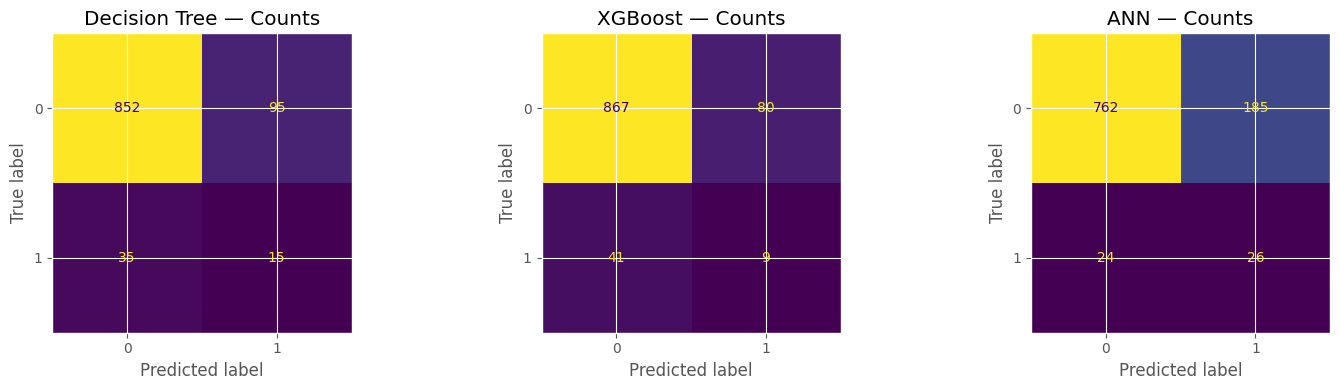

In [37]:
# three confusion matrices in one go (Decision Tree, XGBoost, ANN)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# --- Decision Tree ---
ax = axes[0]
if 'dt' in globals():
    # get predictions if not already made
    if 'y_pred_dt' not in globals():
        y_pred_dt = dt.predict(X_test_scaled)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    ConfusionMatrixDisplay(cm_dt).plot(ax=ax, colorbar=False)
    ax.set_title("Decision Tree — Counts")
else:
    ax.axis('off')
    ax.text(0.5, 0.5, "Decision Tree not found", ha='center', va='center', fontsize=12)

# --- XGBoost ---
ax = axes[1]
if 'xgb' in globals():
    if 'y_pred_xgb' not in globals():
        y_pred_xgb = xgb.predict(X_test_scaled)
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    ConfusionMatrixDisplay(cm_xgb).plot(ax=ax, colorbar=False)
    ax.set_title("XGBoost — Counts")
else:
    ax.axis('off')
    ax.text(0.5, 0.5, "XGBoost not found", ha='center', va='center', fontsize=12)

# --- ANN ---
ax = axes[2]
if 'ann' in globals():
    # if we only have probabilities, convert to classes at 0.5
    if 'y_pred_ann' not in globals():
        if 'y_proba_ann' in globals():
            y_pred_ann = (y_proba_ann >= 0.5).astype(int)
        else:
            y_proba_ann = ann.predict(X_test_scaled, verbose=0).ravel()
            y_pred_ann = (y_proba_ann >= 0.5).astype(int)
    cm_ann = confusion_matrix(y_test, y_pred_ann)
    ConfusionMatrixDisplay(cm_ann).plot(ax=ax, colorbar=False)
    ax.set_title("ANN — Counts")
else:
    ax.axis('off')
    ax.text(0.5, 0.5, "ANN not found", ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


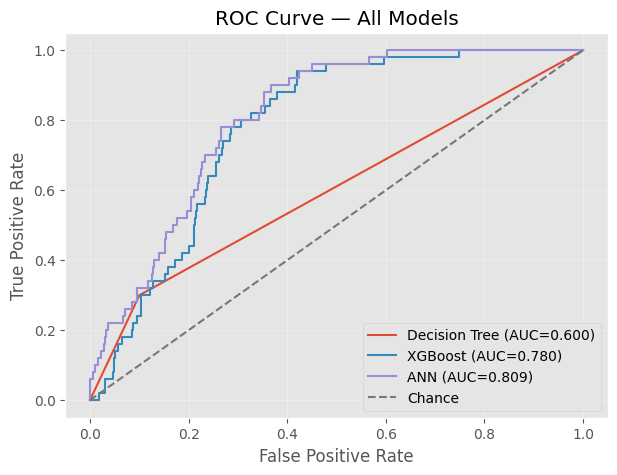

In [38]:
# AUC-ROC for Decision Tree, XGBoost, and ANN in one plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

curves = []  # will store (name, fpr, tpr, auc)

# decision tree: get probabilities if not already set
if 'dt' in globals():
    if 'y_proba_dt' not in globals():
        y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
    auc_dt = roc_auc_score(y_test, y_proba_dt)
    curves.append(("Decision Tree", fpr_dt, tpr_dt, auc_dt))

# xgboost: do the same if model exists
if 'xgb' in globals():
    if 'y_proba_xgb' not in globals() or y_proba_xgb is None:
        y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
    auc_xgb = roc_auc_score(y_test, y_proba_xgb)
    curves.append(("XGBoost", fpr_xgb, tpr_xgb, auc_xgb))

# ann: probabilities from sigmoid output
if 'ann' in globals():
    if 'y_proba_ann' not in globals():
        y_proba_ann = ann.predict(X_test_scaled, verbose=0).ravel()
    fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)
    auc_ann = roc_auc_score(y_test, y_proba_ann)
    curves.append(("ANN", fpr_ann, tpr_ann, auc_ann))

# make sure we have something to plot
if not curves:
    raise RuntimeError("No models found. Train the models first.")

# draw the curves
plt.figure(figsize=(7,5))
for name, fpr, tpr, auc in curves:
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

# chance line
plt.plot([0,1], [0,1], linestyle="--", label="Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — All Models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [39]:
# decision tree hyperparam search (small, sensible grid)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid_dt = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

dt_base = DecisionTreeClassifier(random_state=42)

dt_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid_dt,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True
)

dt_search.fit(X_train_bal, y_train_bal)

dt_best = dt_search.best_estimator_
print("DT best params:", dt_search.best_params_)

# test AUC using probability of class 1
y_proba_dt = dt_best.predict_proba(X_test_scaled)[:, 1]
print("DT test AUC:", round(roc_auc_score(y_test, y_proba_dt), 3))


DT best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
DT test AUC: 0.62


In [40]:
# xgboost hyperparam search (randomized for speed)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

try:
    from xgboost import XGBClassifier

    xgb_base = XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    param_dist_xgb = {
        "n_estimators": [200, 300, 500, 700],
        "max_depth": [3, 4, 5, 6],
        "learning_rate": [0.02, 0.05, 0.1],
        "subsample": [0.7, 0.8, 0.9, 1.0],
        "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
        "reg_lambda": [0.0, 0.5, 1.0, 2.0],
        "gamma": [0.0, 0.5, 1.0]
    }

    xgb_search = RandomizedSearchCV(
        estimator=xgb_base,
        param_distributions=param_dist_xgb,
        n_iter=25,               # keep it reasonable
        scoring="roc_auc",
        cv=5,
        random_state=42,
        n_jobs=-1,
        refit=True,
        verbose=0
    )

    xgb_search.fit(X_train_bal, y_train_bal)

    xgb_best = xgb_search.best_estimator_
    print("XGB best params:", xgb_search.best_params_)

    y_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]
    print("XGB test AUC:", round(roc_auc_score(y_test, y_proba_xgb), 3))

except Exception as e:
    print("XGBoost not available or failed:", e)
    xgb_best = None


XGB best params: {'subsample': 1.0, 'reg_lambda': 2.0, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.9}
XGB test AUC: 0.777
